#Data Processing & Analysis using Spark

## Reading datafile into Spark Dataframe

In [0]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("Read CSV from DBFS") \
    .getOrCreate()

# File path in DBFS
file_path = "/FileStore/tables/Weather_Data.csv"

# Read CSV file into Spark DataFrame
df = spark.read.option("header", "true").csv(file_path)

# Show the DataFrame schema and some data
#df.show()

# Stop Spark session
#spark.stop()

In [0]:
df.printSchema()

root
 |-- row ID: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- Evaporation: string (nullable = true)
 |-- Sunshine: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- Cloud9am: string (nullable = true)
 |-- Cloud3pm: string (nullable = true)
 |-- Temp9am: string (nullable = true)
 |-- Temp3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)



##Importing required Libraries

In [0]:
from pyspark.sql.functions import col, avg, count, stddev, corr, max as spark_max, min as spark_min, when, sum as spark_sum
import logging
import matplotlib.pyplot as plt

In [0]:
# Initialize Spark session and logging
spark = SparkSession.builder.appName("EDA").getOrCreate()
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [0]:
df = df.withColumn("MinTemp", col("MinTemp").cast("double")) \
       .withColumn("MaxTemp", col("MaxTemp").cast("double")) \
       .withColumn("Rainfall", col("Rainfall").cast("double")) \
       .withColumn("Evaporation", col("Evaporation").cast("double")) \
       .withColumn("Sunshine", col("Sunshine").cast("double")) \
       .withColumn("WindGustSpeed", col("WindGustSpeed").cast("double")) \
       .withColumn("WindSpeed9am", col("WindSpeed9am").cast("double")) \
       .withColumn("WindSpeed3pm", col("WindSpeed3pm").cast("double")) \
       .withColumn("Humidity9am", col("Humidity9am").cast("double")) \
       .withColumn("Humidity3pm", col("Humidity3pm").cast("double")) \
       .withColumn("Pressure9am", col("Pressure9am").cast("double")) \
       .withColumn("Pressure3pm", col("Pressure3pm").cast("double")) \
       .withColumn("Cloud9am", col("Cloud9am").cast("double")) \
       .withColumn("Cloud3pm", col("Cloud3pm").cast("double")) \
       .withColumn("Temp9am", col("Temp9am").cast("double")) \
       .withColumn("Temp3pm", col("Temp3pm").cast("double"))

#Exploratory Data Analysis using Spark

##Q1. What is the average MinTemp and MaxTemp for each location?

+-------------+------------------+------------------+
|     Location|        AvgMinTemp|        AvgMaxTemp|
+-------------+------------------+------------------+
|       Cairns|21.252144469525966| 29.57147688838783|
|NorfolkIsland|16.918918918918916|21.841360691144722|
|      Bendigo|  8.74312026002166|22.043722943722937|
|      Walpole|11.911043689320389|20.563526570048285|
|     Canberra| 6.913809990205674|20.935972629521014|
|      Woomera|13.438782051282049|26.695944503735323|
|     Adelaide|12.874643249176732|23.337499999999995|
|        Cobar|12.816945373467123| 25.46276477146044|
|SydneyAirport|14.977679558011047|23.443867403314893|
| PerthAirport|12.688361045130641|25.844418052256536|
|   Wollongong|15.224494382022456|21.641769316909294|
|  Williamtown|12.741440217391315| 24.09605978260869|
|        Moree|12.628811524609846|26.814268585131888|
|      Mildura|10.757191392978482| 24.98108720271807|
|     Portland| 9.355113636363626| 17.80894677236692|
|       Albany|13.0480972515

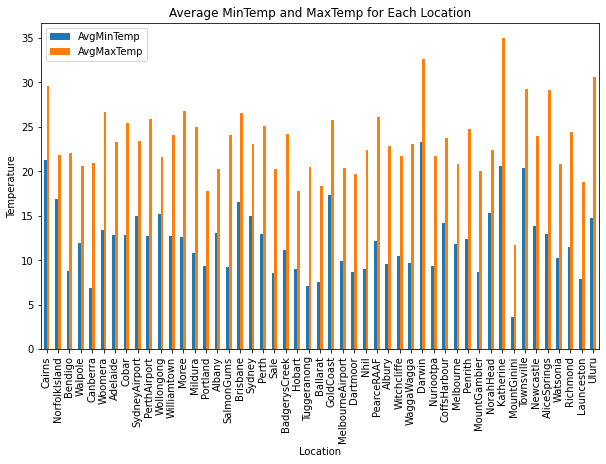

INFO:__main__:Successfully calculated average MinTemp and MaxTemp for each location.


In [0]:
try:
    avg_temp = df.groupBy("Location").agg(avg("MinTemp").alias("AvgMinTemp"), avg("MaxTemp").alias("AvgMaxTemp"))
    avg_temp.show()
    avg_temp_pd = avg_temp.toPandas()
    avg_temp_pd.plot(x="Location", y=["AvgMinTemp", "AvgMaxTemp"], kind="bar", figsize=(10, 6))
    plt.title("Average MinTemp and MaxTemp for Each Location")
    plt.ylabel("Temperature")
    plt.show()
    logger.info("Successfully calculated average MinTemp and MaxTemp for each location.")
except Exception as e:
    logger.error("Error calculating average MinTemp and MaxTemp: %s", e)


##Q2. What is the total rainfall for each location?

+-------------+------------------+
|     Location|     TotalRainfall|
+-------------+------------------+
|       Cairns| 5285.199999999999|
|NorfolkIsland|2975.6999999999994|
|      Bendigo| 1632.600000000003|
|      Walpole|2361.8000000000006|
|     Canberra| 1770.500000000002|
|      Woomera| 373.5999999999999|
|     Adelaide|1510.8000000000006|
|        Cobar|1066.4000000000003|
|SydneyAirport|2972.9999999999986|
| PerthAirport|1193.6000000000004|
|   Wollongong|3304.9999999999986|
|  Williamtown|2390.2999999999993|
|        Moree|1080.5000000000005|
|      Mildura|             795.3|
|     Portland| 2211.400000000001|
|       Albany| 2255.400000000001|
|   SalmonGums|  939.000000000001|
|     Brisbane| 2993.799999999999|
|       Sydney| 3357.199999999994|
|        Perth| 1622.600000000001|
+-------------+------------------+
only showing top 20 rows



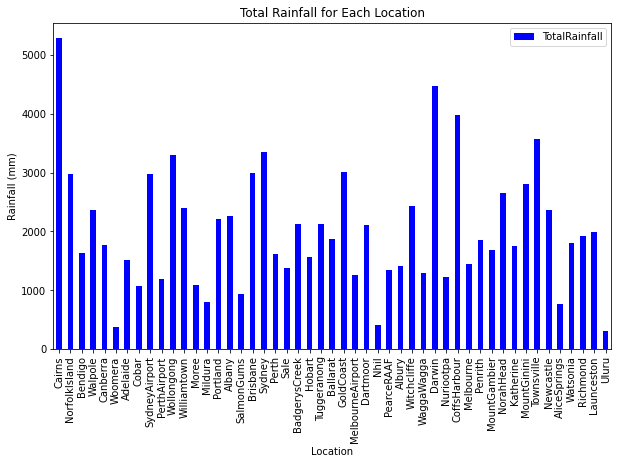

INFO:__main__:Successfully calculated total rainfall for each location.


In [0]:
try:
    total_rainfall = df.groupBy("Location").agg(spark_sum("Rainfall").alias("TotalRainfall"))
    total_rainfall.show()
    total_rainfall_pd = total_rainfall.toPandas()
    total_rainfall_pd.plot(x="Location", y="TotalRainfall", kind="bar", color="blue", figsize=(10, 6))
    plt.title("Total Rainfall for Each Location")
    plt.ylabel("Rainfall (mm)")
    plt.show()
    logger.info("Successfully calculated total rainfall for each location.")
except Exception as e:
    logger.error("Error calculating total rainfall: %s", e)


##Q3. Find the location with the highest average Sunshine.

In [0]:
try:
    highest_sunshine = df.groupBy("Location").agg(avg("Sunshine").alias("AvgSunshine")).orderBy(col("AvgSunshine").desc()).first()
    if highest_sunshine:
        logger.info("Location with highest average Sunshine: %s", highest_sunshine["Location"])
        print(f"Location with highest average Sunshine: {highest_sunshine['Location']}")
    else:
        logger.info("No data available to determine the highest average Sunshine location.")
except Exception as e:
    logger.error("Error finding location with highest average Sunshine: %s", e)


INFO:__main__:Location with highest average Sunshine: AliceSprings


Location with highest average Sunshine: AliceSprings


##Q4. Calculate the correlation between MaxTemp and Rainfall.

In [0]:
try:
    correlation = df.stat.corr("MaxTemp", "Rainfall")
    logger.info("Correlation between MaxTemp and Rainfall: %f", correlation)
    print(f"Correlation between MaxTemp and Rainfall: {correlation}")
except Exception as e:
    logger.error("Error calculating correlation between MaxTemp and Rainfall: %s", e)


INFO:__main__:Correlation between MaxTemp and Rainfall: -0.073813


Correlation between MaxTemp and Rainfall: -0.07381313355637874


##Q5. Find the most common WindGustDir for each location.

+----------------+-----------+-----+
|        Location|WindGustDir|count|
+----------------+-----------+-----+
|        Adelaide|        WSW|  162|
|          Albany|         NA|  965|
|          Albury|          W|  150|
|    AliceSprings|        ESE|  213|
|   BadgerysCreek|         SW|   95|
|        Ballarat|          N|  142|
|         Bendigo|        SSE|  161|
|        Brisbane|          E|  164|
|          Cairns|         SE|  282|
|        Canberra|         NW|  173|
|           Cobar|         SW|  122|
|    CoffsHarbour|         SW|  113|
|        Dartmoor|        SSW|  118|
|          Darwin|          E|  159|
|       GoldCoast|        SSE|  180|
|          Hobart|        NNW|  205|
|       Katherine|          E|  109|
|      Launceston|        NNW|  281|
|       Melbourne|          N|  220|
|MelbourneAirport|          N|  288|
+----------------+-----------+-----+
only showing top 20 rows



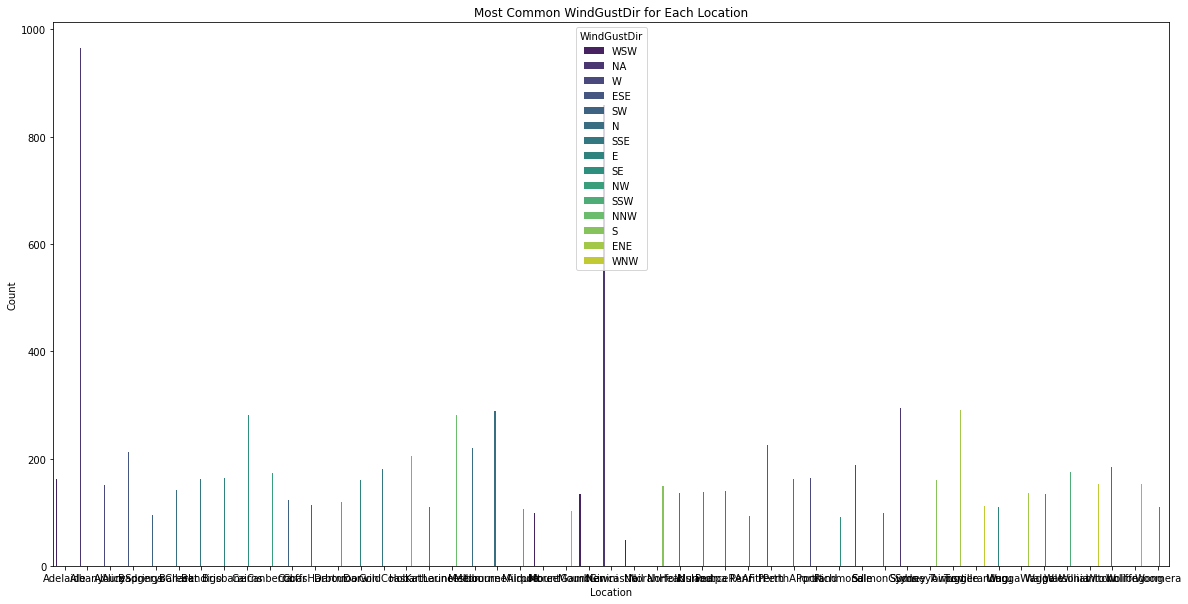

INFO:__main__:Successfully found and visualized the most common WindGustDir for each location.


In [0]:
import pandas as pd
import seaborn as sns

try:
    # Calculate the most common WindGustDir for each location
    common_wind_gust_dir = df.groupBy("Location", "WindGustDir").count().orderBy(col("count").desc())
    
    # Get the most common WindGustDir for each location
    from pyspark.sql.window import Window
    from pyspark.sql.functions import row_number

    windowSpec = Window.partitionBy("Location").orderBy(col("count").desc())
    most_common_wind_gust_dir = common_wind_gust_dir.withColumn("row_number", row_number().over(windowSpec)).filter(col("row_number") == 1).drop("row_number")
    most_common_wind_gust_dir.show()

    # Convert to Pandas DataFrame for plotting
    most_common_wind_gust_dir_pd = most_common_wind_gust_dir.toPandas()

    # Plotting the data using seaborn
    plt.figure(figsize=(20, 10))
    sns.barplot(x="Location", y="count", hue="WindGustDir", data=most_common_wind_gust_dir_pd, palette="viridis")
    plt.title("Most Common WindGustDir for Each Location")
    plt.ylabel("Count")
    plt.xlabel("Location")
    plt.legend(title="WindGustDir")
    plt.show()
    
    logger.info("Successfully found and visualized the most common WindGustDir for each location.")
except Exception as e:
    logger.error("Error finding or visualizing the most common WindGustDir: %s", e)




## Q6. What is the maximum WindGustSpeed recorded for each location ?

+-------------+----------------+
|     Location|MaxWindGustSpeed|
+-------------+----------------+
|       Cairns|            81.0|
|NorfolkIsland|            91.0|
|      Bendigo|            94.0|
|      Walpole|           104.0|
|     Canberra|           106.0|
|      Woomera|           115.0|
|     Adelaide|            80.0|
|        Cobar|           100.0|
|SydneyAirport|           107.0|
| PerthAirport|           107.0|
|   Wollongong|           120.0|
|  Williamtown|           102.0|
|        Moree|           117.0|
|      Mildura|           102.0|
|     Portland|            98.0|
|       Albany|            null|
|   SalmonGums|            93.0|
|     Brisbane|            93.0|
|       Sydney|            94.0|
|        Perth|            83.0|
+-------------+----------------+
only showing top 20 rows



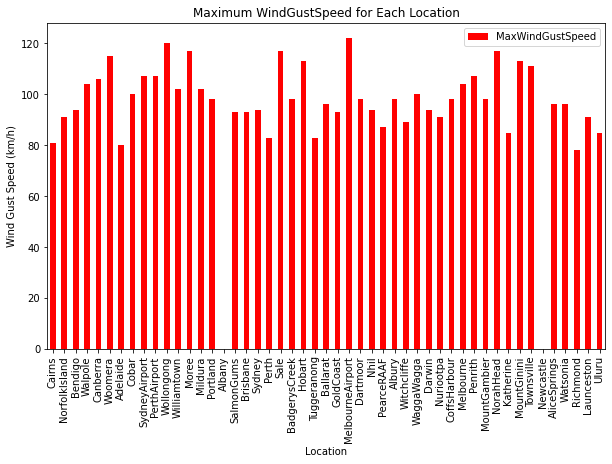

INFO:__main__:Successfully calculated maximum WindGustSpeed for each location.


In [0]:
try:
    max_wind_gust_speed = df.groupBy("Location").agg(spark_max("WindGustSpeed").alias("MaxWindGustSpeed"))
    max_wind_gust_speed.show()
    max_wind_gust_speed_pd = max_wind_gust_speed.toPandas()
    max_wind_gust_speed_pd.plot(x="Location", y="MaxWindGustSpeed", kind="bar", color="red", figsize=(10, 6))
    plt.title("Maximum WindGustSpeed for Each Location")
    plt.ylabel("Wind Gust Speed (km/h)")
    plt.show()
    logger.info("Successfully calculated maximum WindGustSpeed for each location.")
except Exception as e:
    logger.error("Error calculating maximum WindGustSpeed: %s", e)


##Q7. Determine the variance of Pressure9am for each location.

+-------------+------------------+
|     Location| StdDevPressure9am|
+-------------+------------------+
|       Cairns| 4.209737476625568|
|NorfolkIsland| 5.344327542710466|
|      Bendigo|7.3104281327591485|
|      Walpole| 6.968750113831414|
|     Canberra| 7.524644581584048|
|      Woomera| 6.742709917448051|
|     Adelaide| 7.484511377931585|
|        Cobar| 6.632849165644917|
|SydneyAirport|6.8679699281690665|
| PerthAirport| 6.433589931932569|
|   Wollongong| 7.196519102146923|
|  Williamtown| 6.598622826271829|
|        Moree| 5.960192262110738|
|      Mildura| 7.308062324982315|
|     Portland|7.9990573121935356|
|       Albany|7.2347927943026775|
|   SalmonGums|              null|
|     Brisbane| 5.572261798777524|
|       Sydney| 6.864913800524159|
|        Perth| 6.512664127358381|
+-------------+------------------+
only showing top 20 rows



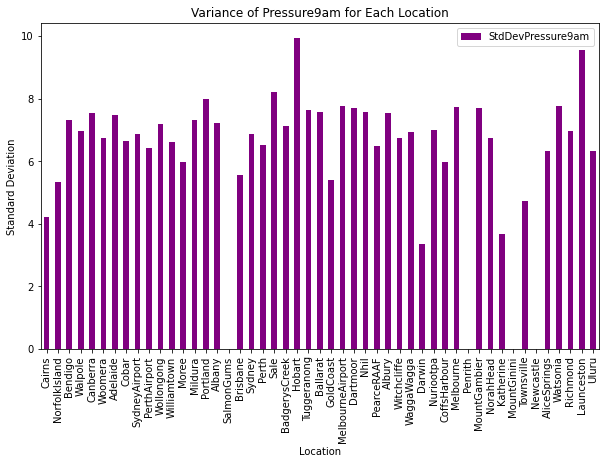

INFO:__main__:Successfully calculated variance of Pressure9am for each location.


In [0]:
try:
    variance_pressure = df.groupBy("Location").agg(stddev("Pressure9am").alias("StdDevPressure9am"))
    variance_pressure.show()
    variance_pressure_pd = variance_pressure.toPandas()
    variance_pressure_pd.plot(x="Location", y="StdDevPressure9am", kind="bar", color="purple", figsize=(10, 6))
    plt.title("Variance of Pressure9am for Each Location")
    plt.ylabel("Standard Deviation")
    plt.show()
    logger.info("Successfully calculated variance of Pressure9am for each location.")
except Exception as e:
    logger.error("Error calculating variance of Pressure9am: %s", e)


##Q8. Find the location with the highest average humidity at 3pm.

In [0]:
try:
    highest_humidity_3pm = df.groupBy("Location").agg(avg("Humidity3pm").alias("AvgHumidity3pm")).orderBy(col("AvgHumidity3pm").desc()).first()
    if highest_humidity_3pm:
        logger.info("Location with highest average humidity at 3pm: %s", highest_humidity_3pm["Location"])
        print(f"Location with highest average humidity at 3pm: {highest_humidity_3pm['Location']}")
    else:
        logger.info("No data available to determine the location with highest average humidity at 3pm.")
except Exception as e:
    logger.error("Error finding location with highest average humidity at 3pm: %s", e)


INFO:__main__:Location with highest average humidity at 3pm: MountGinini


Location with highest average humidity at 3pm: MountGinini


##Q9. Calculate the average wind speed at 9am and 3pm for each location.

+-------------+------------------+------------------+
|     Location|   AvgWindSpeed9am|   AvgWindSpeed3pm|
+-------------+------------------+------------------+
|       Cairns|15.830890642615557|21.874859075535515|
|NorfolkIsland|20.440347071583513|22.055075593952484|
|      Bendigo|12.851731601731602| 16.97294372294372|
|      Walpole|13.370772946859903|16.949397590361446|
|     Canberra| 10.36656282450675| 19.18172377985462|
|      Woomera| 20.37005347593583|20.621794871794872|
|     Adelaide| 9.849615806805708|15.354555433589463|
|        Cobar|14.732662192393736|15.374720357941834|
|SydneyAirport|18.636061946902654| 25.79447513812155|
| PerthAirport| 17.22473246135553|21.073634204275535|
|   Wollongong| 16.72686230248307| 22.08813559322034|
|  Williamtown| 16.48431105047749|22.536784741144412|
|        Moree|18.043742405832322|16.903030303030302|
|      Mildura|14.277777777777779|16.486976217440542|
|     Portland| 16.22108843537415|20.637599093997736|
|       Albany|12.4186046511

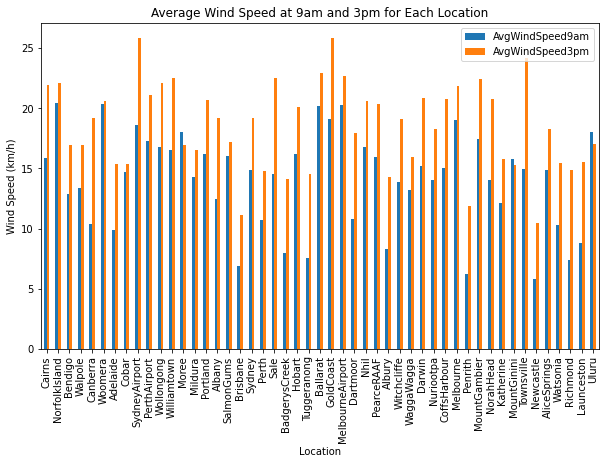

INFO:__main__:Successfully calculated average wind speed at 9am and 3pm for each location.


In [0]:
try:
    avg_wind_speed = df.groupBy("Location").agg(avg("WindSpeed9am").alias("AvgWindSpeed9am"), avg("WindSpeed3pm").alias("AvgWindSpeed3pm"))
    avg_wind_speed.show()
    avg_wind_speed_pd = avg_wind_speed.toPandas()
    avg_wind_speed_pd.plot(x="Location", y=["AvgWindSpeed9am", "AvgWindSpeed3pm"], kind="bar", figsize=(10, 6))
    plt.title("Average Wind Speed at 9am and 3pm for Each Location")
    plt.ylabel("Wind Speed (km/h)")
    plt.show()
    logger.info("Successfully calculated average wind speed at 9am and 3pm for each location.")
except Exception as e:
    logger.error("Error calculating average wind speed: %s", e)


##Q10. Determine the relationship between Cloud9am and Cloud3pm using correlation.

In [0]:
try:
    cloud_correlation = df.stat.corr("Cloud9am", "Cloud3pm")
    logger.info("Correlation between Cloud9am and Cloud3pm: %f", cloud_correlation)
    print(f"Correlation between Cloud9am and Cloud3pm: {cloud_correlation}")
except Exception as e:
    logger.error("Error calculating correlation between Cloud9am and Cloud3pm: %s", e)


INFO:__main__:Correlation between Cloud9am and Cloud3pm: 0.698781


Correlation between Cloud9am and Cloud3pm: 0.6987814622704244


# Queries using Spark

##Q11. Average Maximum Temperature by Location

In [0]:
try:

    avg_max_temp = df.groupBy("Location").agg(avg(col("MaxTemp").cast("float")).alias("AvgMaxTemp"))
    avg_max_temp.show()
    
    logger.info("Query executed successfully: Average Maximum Temperature by Location")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")

INFO:__main__:Query executed successfully: Average Maximum Temperature by Location


+-------------+------------------+
|     Location|        AvgMaxTemp|
+-------------+------------------+
|       Cairns|29.571476870755063|
|NorfolkIsland| 21.84136068949689|
|      Bendigo|22.043722947438557|
|      Walpole|20.563526578571487|
|     Canberra|20.935972630919366|
|      Woomera| 26.69594449600008|
|     Adelaide| 23.33749998347801|
|        Cobar|25.462764759127513|
|SydneyAirport| 23.44386740310416|
| PerthAirport|25.844418091898575|
|   Wollongong| 21.64176928956992|
|  Williamtown| 24.09605977975804|
|        Moree| 26.81426857529784|
|      Mildura|24.981087242895452|
|     Portland|17.808946768262782|
|       Albany|20.219077567134512|
|   SalmonGums|24.059544457789357|
|     Brisbane|26.509489026631503|
|       Sydney|23.045799171338317|
|        Perth|25.091290304737708|
+-------------+------------------+
only showing top 20 rows



##Q12. Days with Rainfall Over 20mm.

In [0]:
try:
    # Query
    rainfall_over_20 = df.filter(col("Rainfall").cast("float") > 20).count()
    print(f"Days with Rainfall over 20mm: {rainfall_over_20}")
    
    logger.info("Query executed successfully: Days with Rainfall Over 20mm")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Days with Rainfall Over 20mm


Days with Rainfall over 20mm: 1197


##Q13. Highest Wind Gust Speed Recorded

In [0]:
try:
    # Query
    highest_wind_gust = df.orderBy(col("WindGustSpeed").cast("float").desc()).select("Location", "WindGustSpeed").first()
    print(f"Highest Wind Gust Speed: {highest_wind_gust['WindGustSpeed']} at {highest_wind_gust['Location']}")
    
    logger.info("Query executed successfully: Highest Wind Gust Speed Recorded")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Highest Wind Gust Speed Recorded


Highest Wind Gust Speed: 122.0 at MelbourneAirport


##Q14. Locations with Average Humidity Over 60%

In [0]:
try:
    # Query
    high_humidity_locations = df.groupBy("Location").agg(avg(col("Humidity3pm").cast("float")).alias("AvgHumidity3pm")).filter(col("AvgHumidity3pm") > 60)
    high_humidity_locations.show()
    
    logger.info("Query executed successfully: Locations with Average Humidity Over 60%")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Locations with Average Humidity Over 60%


+-------------+-----------------+
|     Location|   AvgHumidity3pm|
+-------------+-----------------+
|       Cairns|61.59639233370913|
|NorfolkIsland|68.04319654427646|
|      Walpole|66.48229548229548|
|   Wollongong|66.03611738148985|
|     Portland|66.70568181818182|
|       Albany|67.11684782608695|
|    GoldCoast| 62.7247007616975|
|     Dartmoor|62.52289156626506|
| CoffsHarbour|62.00678733031674|
|    NorahHead|67.15195530726257|
|  MountGinini| 69.6629491945477|
+-------------+-----------------+



##Q15. Average Temperature at 9am for Locations with No Rain


In [0]:
try:
    # Query
    avg_temp_no_rain = df.filter(col("RainToday") == "No").groupBy("Location").agg(avg(col("Temp9am").cast("float")).alias("AvgTemp9am"))
    avg_temp_no_rain.show()
    
    logger.info("Query executed successfully: Average Temperature at 9am for Locations with No Rain")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Average Temperature at 9am for Locations with No Rain


+-------------+------------------+
|     Location|        AvgTemp9am|
+-------------+------------------+
|       Cairns| 25.85531194214073|
|NorfolkIsland|20.124519253388428|
|      Bendigo|14.610796202371317|
|      Walpole| 17.02544806251389|
|     Canberra| 12.49067486680907|
|      Woomera| 18.14226805631238|
|     Adelaide| 18.18818565695933|
|        Cobar|17.943060977913525|
|SydneyAirport| 18.87126102685229|
| PerthAirport| 19.52804009256104|
|   Wollongong| 18.76029853251443|
|  Williamtown| 18.57159534038737|
|        Moree| 18.67721519859196|
|      Mildura|15.928263645812736|
|     Portland|13.784181840203026|
|       Albany|17.054689726616225|
|   SalmonGums|17.555424849192303|
|     Brisbane|21.793874833301285|
|       Sydney|18.148603343430842|
|        Perth| 19.39973858789681|
+-------------+------------------+
only showing top 20 rows



##Q16. Maximum Evaporation Recorded

In [0]:
try:
    # Query
    max_evaporation = df.orderBy(col("Evaporation").cast("float").desc()).select("Location", "Evaporation").first()
    print(f"Maximum Evaporation: {max_evaporation['Evaporation']} at {max_evaporation['Location']}")
    
    logger.info("Query executed successfully: Maximum Evaporation Recorded")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Maximum Evaporation Recorded


Maximum Evaporation: 145.0 at Williamtown


##Q17.  Average Sunshine Hours for Each Location

In [0]:
try:
    # Query
    avg_sunshine = df.groupBy("Location").agg(avg(col("Sunshine").cast("float")).alias("AvgSunshine"))
    avg_sunshine.show()
    
    logger.info("Query executed successfully: Average Sunshine Hours for Each Location")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Average Sunshine Hours for Each Location


+-------------+-----------------+
|     Location|      AvgSunshine|
+-------------+-----------------+
|       Cairns|7.556149732192012|
|NorfolkIsland|7.090399009721386|
|      Bendigo|             null|
|      Walpole|             null|
|     Canberra|7.383655915930066|
|      Woomera|9.191289776558653|
|     Adelaide|7.744040405644913|
|        Cobar|8.043030301684682|
|SydneyAirport| 7.35771365557176|
| PerthAirport|9.000475620994882|
|   Wollongong|             null|
|  Williamtown|7.249318785478211|
|        Moree|8.918093701628953|
|      Mildura|8.513261642534031|
|     Portland|6.320954912813968|
|       Albany| 6.72132998624515|
|   SalmonGums|             null|
|     Brisbane|8.050422841277422|
|       Sydney|7.177674902265761|
|        Perth| 8.90955960829007|
+-------------+-----------------+
only showing top 20 rows



##Q18. Days with Wind Speed Over 40km/h at 3pm

In [0]:
try:
    # Query
    wind_speed_over_40 = df.filter(col("WindSpeed3pm").cast("float") > 40).count()
    print(f"Days with Wind Speed over 40km/h at 3pm: {wind_speed_over_40}")
    
    logger.info("Query executed successfully: Days with Wind Speed Over 40km/h at 3pm")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Days with Wind Speed Over 40km/h at 3pm


Days with Wind Speed over 40km/h at 3pm: 741


##Q19. Locations with Consistent Cloud Cover at 9am

In [0]:
try:
    # Query
    high_cloud_cover_locations = df.groupBy("Location").agg(avg(col("Cloud9am").cast("float")).alias("AvgCloud9am")).filter(col("AvgCloud9am") > 5)
    high_cloud_cover_locations.show()
    
    logger.info("Query executed successfully: Locations with Consistent Cloud Cover at 9am")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Locations with Consistent Cloud Cover at 9am


+----------------+------------------+
|        Location|       AvgCloud9am|
+----------------+------------------+
|      Wollongong|6.1291866028708135|
|        Portland| 6.311345646437995|
|          Albany| 5.221174004192872|
|            Sale| 5.344913151364764|
|        Ballarat| 5.705960264900662|
|MelbourneAirport| 5.222988505747127|
|          Albury| 6.326815642458101|
|       Melbourne| 5.252032520325203|
|    MountGambier| 5.410465116279069|
|        Watsonia| 5.182844243792325|
|        Richmond| 6.297297297297297|
|      Launceston| 6.378260869565217|
|           Uluru| 5.458333333333333|
+----------------+------------------+



##Q20. Average Pressure at 9am and 3pm for Each Location

In [0]:
try:
    # Query
    avg_pressure = df.groupBy("Location").agg(
        avg(col("Pressure9am").cast("float")).alias("AvgPressure9am"),
        avg(col("Pressure3pm").cast("float")).alias("AvgPressure3pm")
    )
    avg_pressure.show()
    
    logger.info("Query executed successfully: Average Pressure at 9am and 3pm for Each Location")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Average Pressure at 9am and 3pm for Each Location


+-------------+------------------+------------------+
|     Location|    AvgPressure9am|    AvgPressure3pm|
+-------------+------------------+------------------+
|       Cairns|1014.2303274814816|1011.1825259444141|
|NorfolkIsland|1017.4923159776828|1015.7766735497098|
|      Bendigo|1017.9464640653691|1015.7480436905571|
|      Walpole|1018.1256630035768|1016.4332532032427|
|     Canberra|1018.9118864916661|1016.1502613143048|
|      Woomera|1018.6354758701141|1015.9068662455154|
|     Adelaide|1018.7658970731057|1016.7589004013564|
|        Cobar|1018.2055118247548|1015.5392130991046|
|SydneyAirport|1018.2133992513021|1015.9318576238852|
| PerthAirport|1017.9418537443798|  1015.36318179604|
|   Wollongong|1017.8408153992391|1015.7804494793495|
|  Williamtown| 1018.394557241842|1015.8499314911511|
|        Moree|1018.2690660215968|1014.9202637157852|
|      Mildura|1018.7133931085282|1016.2780293759512|
|     Portland|1017.4275612103369|1016.3980691414009|
|       Albany|1018.09268510

##Q21. Most Common Wind Direction at 9am

In [0]:
try:
    # Query
    most_common_wind_dir_9am = df.groupBy("WindDir9am").count().orderBy(col("count").desc()).first()
    print(f"Most Common Wind Direction at 9am: {most_common_wind_dir_9am['WindDir9am']}")
    
    logger.info("Query executed successfully: Most Common Wind Direction at 9am")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Most Common Wind Direction at 9am


Most Common Wind Direction at 9am: N


##Q22. Maximum Humidity Recorded at 3pm

In [0]:
try:
    # Query
    max_humidity_3pm = df.orderBy(col("Humidity3pm").cast("float").desc()).select("Location", "Humidity3pm").first()
    print(f"Maximum Humidity at 3pm: {max_humidity_3pm['Humidity3pm']} at {max_humidity_3pm['Location']}")
    
    logger.info("Query executed successfully: Maximum Humidity Recorded at 3pm")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Maximum Humidity Recorded at 3pm


Maximum Humidity at 3pm: 100.0 at Uluru


##Q23. Average Cloud Cover Increase from Morning to Afternoon

In [0]:
try:
    # Query
    avg_cloud_cover_increase = df.withColumn("CloudCoverIncrease", col("Cloud3pm").cast("float") - col("Cloud9am").cast("float")) \
                                  .agg(avg("CloudCoverIncrease").alias("AvgCloudCoverIncrease"))
    
    avg_cloud_cover_increase.show()
    
    logger.info("Query executed successfully: Average Cloud Cover Increase from Morning to Afternoon")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Average Cloud Cover Increase from Morning to Afternoon


+---------------------+
|AvgCloudCoverIncrease|
+---------------------+
|  0.05509257358676464|
+---------------------+



##Q24. Locations with the Highest Average Sunshine Hours

In [0]:
try:
    # Query
    avg_sunshine_hours = df.groupBy("Location") \
                           .agg(avg(col("Sunshine").cast("float")).alias("AvgSunshineHours")) \
                           .orderBy(col("AvgSunshineHours").desc())
    
    top_location = avg_sunshine_hours.select("Location").first()
    print(f"Location with the Highest Average Sunshine Hours: {top_location['Location']}")
    
    logger.info("Query executed successfully: Locations with the Highest Average Sunshine Hours")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")



INFO:__main__:Query executed successfully: Locations with the Highest Average Sunshine Hours


Location with the Highest Average Sunshine Hours: AliceSprings


##Q25. Average Pressure Change from Morning to Afternoon

In [0]:
try:
    # Query
    avg_pressure_change = df.withColumn("PressureChange", col("Pressure3pm").cast("float") - col("Pressure9am").cast("float")) \
                            .agg(avg("PressureChange").alias("AvgPressureChange"))
    
    avg_pressure_change.show()
    
    logger.info("Query executed successfully: Average Pressure Change from Morning to Afternoon")
except Exception as e:
    logger.error(f"Error in query execution: {str(e)}")


INFO:__main__:Query executed successfully: Average Pressure Change from Morning to Afternoon


+------------------+
| AvgPressureChange|
+------------------+
|-2.390892185728181|
+------------------+

